In [5]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt

#Function to create lattice in [0,1]^2
#Parameters: n - positive integer
#Output: a lattice in [0,1]^2 with n^2 equally spaced points
def LatticeSet(n):
    X=np.linspace(0,1,n)
    Y=np.linspace(0,1,n)
    return np.transpose([np.tile(X, len(Y)), np.repeat(Y, len(X))])
    
#Function to create C_{2,3}^n
#Parameters: n - positive integer
#Output: the set C_{2,3}^n
def cantor(n):
    return [0.] + cant(0., 1., n) + [1.]

#Helper function for cantor that takes a subinterval [x,y] and
#splits it into 2 subintervals
#Parameters: x - left endpoint of interval
#            y - right endpoint of interval
#            n - number of steps remaining in set construction
#Output: the set obtained after repeating n steps of the C_{2,3} construction 
#        on [x,y]
def cant(x, y, n):
    if n == 0:
        return [] #Stop construction after the n-th step
    #Add endpoints of 2 new subintervals
    new_pts = [2.*x/3. + y/3., x/3. + 2.*y/3.] 
    #Apply construction to the subintervals
    return cant(x, new_pts[0], n-1) + new_pts + cant(new_pts[1], y, n-1) 
    
#Functions to create C_{2,4}^n
#Parameters: n - positive integer
#Output: the set C_{2,4}^n
def cantor_alt(n):
    can = [0,1]
    #Runs n steps of the C_{2,4} construction
    for i in range(n):
        temp = can.copy()
        can = []
        #Iterates over all subintervals in the set and splits them into 2 subintervals
        for j in range(2**i):
            can += cantor_alt_helper([temp[2*j],temp[2*j+1]],i+1)
    return can
        
#Helper function for cantor_alt that takes an interval [x,y] and 
#splits it into 2 subintervals
#Parameters: small_set - interval to be split into 2 subintervals
#            i - positive integer
#Output: the 2 subintervals resulting from small_set
def cantor_alt_helper(small_set,i):
    return [small_set[0], small_set[0]+1/(4**i), small_set[0]+2/(4**i), small_set[0]+3/(4**i)]

#Parameters: X - 2d array representing a data set 
#            n - number of principal components to be selected from X
#Output: graph of the projection of X onto plane generated by its 
#        first n principal components
def PCA(X, n):
    #Subtract mean of each variable from all points in the data set 
    X_mean = X - np.mean(X , axis = 0)
     
    #Compute covariance matrix of standardized data set
    cov_mat = np.cov(X_mean , rowvar = False)
     
    #Compute eigenvalues and eigenvectors of covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Sort eigenvalues in descending order along with their corresponding eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Take first n eigenvectors
    eigenvector_subset = sorted_eigenvectors[:,0:n]
     
    #Project standardized data onto plane generated by first n principal components
    X_reduced = np.dot(eigenvector_subset.transpose() , X_mean.transpose() ).transpose()
    
    #Plot the result
    plt.scatter(X_reduced[:,0],X_reduced[:,1])
    plt.show()
    
#Define the distance function
#Parameters: two arrays of length n representing vectors in R^n
#Output: the norm of the difference between the vectors in R^n
def dist(a,b):
    norm = 0
    for i in range(len(a)):
        norm += (a[i]-b[i])**2
    return norm**.5

#Define the discrete energy function 
#Parameters: a discrete set P with dimension d,  an integer s in [0,d], 
#            and N = |P|
#Output: the discrete s-energy of P
def DiscreteEnergy(P,s,N):
    c=0
    for i in range(N):
        for j in range(N):
            #Sums over all points p,p' in P such that p != p'
            if i<j:
                c=c+(dist(P[i],P[j]))**(-s)
    return c/N**2
    
#alternative for efficiency improvements
def DiscreteEnergyAlt(P,s,N):
    c=0
    for i in range(N-1):
        # P[i+1:] is the list of points after P[i]
        # Then, from each point in this list, we subtract P[i]
        diff = P[i+1:] - P[i]
        # Then we compute the norm of each one of those points.
        # Each point is a row of our array P, so we pass 
        # the argument axis = 1 to indicate that.
        norms = np.linalg.norm(diff, axis=1)
        # Then we take -s'th power of those numbers and sum them
        c += np.sum(np.power(norms, -s))
    return c/N**2

#One dimensional discrete energy function
#Parameters: a discrete set P with dimension 1,  an integer s in [0,1], 
#            and N = |P|
#Output: the discrete s-energy of P
def DiscreteEnergyOneDim(P,s,N):
    c=0 
    for i in range(N):
        for j in range(N):
            if i<j:
                #Sums over all points p,p' in P such that p != p'
                c=c+(abs(P[i]-P[j]))**(-s)
    return c/N**2

# essentially identical to DiscreteEnergyAlt
# except the input P is a 1-d array.
# (casting P to a trivial 2-d array and using
# DiscreteEnergyAlt results in slightly worse
# runtime, hence the new definition)
def DiscreteEnergyOneDimAlt(P,s,N):
    P = np.array(P) # making sure we are using numpy array
    c=0 
    for i in range(N-1):
        diff = P[i+1:] - P[i]
        c += np.sum(np.abs(diff)**(-s))
    return c/N**2

#Takes as input a k x 2 array and returns the first column of the array
def getX(data):
    X = []
    for i in range(len(data)):
        X.append(data[i][0])
    return X

#Takes as input a k x 2 array and returns the second column of the array
def getY(data):
    Y = []
    for i in range(len(data)):
        Y.append(data[i][0])
    return Y

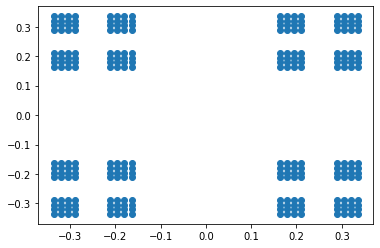

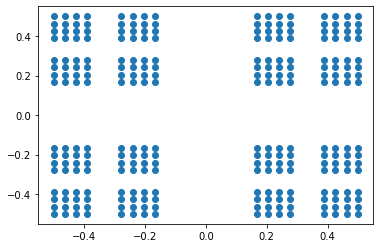

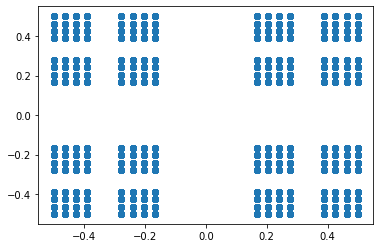

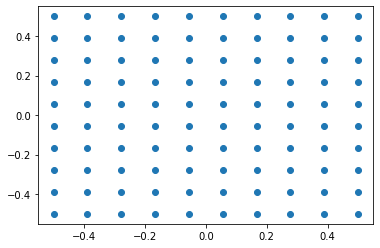

In [10]:
X = cantor_alt(3) #C_{2,4}^3
Y = cantor(3) #C_{2,3}^3

#Constructing C_{2,4}^3 x C_{2,4}^3 and running PCA on it with 2 components
cantor1 = []
for i in range(len(X)):
    for j in range(len(X)):
        cantor1.append([X[i], X[j]])
PCA(cantor1,2)

#Constructing C_{2,3}^3 x C_{2,3}^3 and running PCA on it with 2 components
cantor2 = []
for i in range(len(Y)):
    for j in range(len(Y)):
        cantor2.append([Y[i], Y[j]])
PCA(cantor2,2)

#Constructing C_{2,4}^3 x C_{2,3}^3 x C_{2,3}^3 and running PCA on it with 2 components
cantor3 = []
for i in range(len(X)):
    for j in range(len(Y)):
        for k in range(len(Y)):
            cantor3.append([X[i], Y[j], Y[k]])
PCA(cantor3,2)

#Constructing a 10 x 10 lattice in [0,1]^2 and running PCA on it with 2 components
Z = LatticeSet(10)
PCA(Z,2)

In [ ]:
#Computes the discrete s-energy for C_{2,4}^k with 1 <= k <= 15 and s = ln(2)/ln(4) and plots the results
data = []
for i in range(15):
    data.append([i+1,DiscreteEnergyOneDimAlt(cantor_alt(i+1),np.log(2)/np.log(4),2**(i+1+1))])
plt.plot(getX(data),getY(data))
plt.show()

#Computes the discrete s-energy for C_{2,3}^k with 1 <= k <= 15 and s = ln(2)/ln(3) + 1/2 and plots the results
data = []
for i in range(15):
    data.append([i+1,DiscreteEnergyOneDimAlt(cantor(i+1),np.log(2)/np.log(3),2**(i+2))])
plt.plot(getX(data),getY(data))
plt.show()

#Computes the discrete s-energy for C_{2,4}^k x C_{2,3}^k with 1 <= k <= 7 and s = ln(2)/ln(3) + 1/2 and plots the results
data = []
for i in range(15):
    data.append([i+1,DiscreteEnergyOneDimAlt(cantor(i+1),np.log(2)/np.log(3),2**(i+2))])
plt.plot(getX(data),getY(data))
plt.show()

#Computes the discrete 2-energy for lattice with k^2 points with 1 <= k <= 15 and plots the results
data = []
for i in range(15):
    data.append([i+1,DiscreteEnergyOneDimAlt(LatticeSet(i+1),np.log(2)/np.log(3),(i_1)**2)])
plt.plot(getX(data),getY(data))
plt.show()